### Parameterized Quantum Circuits
Variational algorithms operate by exploring a range of quantum states, which can be prepared using a parameterized quantum circuit, where gates are defined with tunable parameters. 

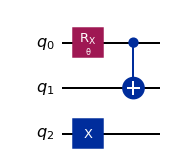

In [1]:
from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter("θ")
qc = QuantumCircuit(3)
qc.rx(theta, 0)
qc.cx(0,1)
qc.x(2)

qc.draw('mpl')

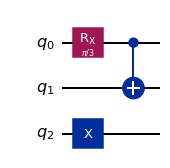

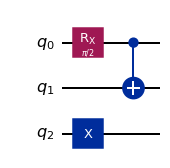

In [2]:
from math import pi

angle_list = [pi/3, pi/2]
circuits = [qc.assign_parameters({theta: angle}) for angle in angle_list]

for circuit in circuits:
    display(circuit.draw('mpl'))

### N-local circuits
They are one of the most widely used examples of heuristic ansatzes because of their efficient implementation and ability to capture important correlations. 

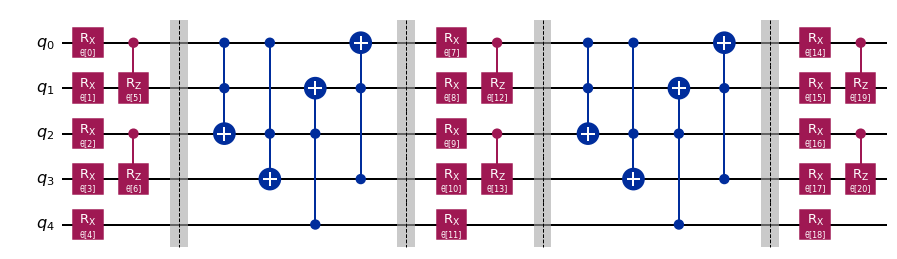

In [4]:
from qiskit.circuit.library import NLocal, CCXGate, CRZGate, RXGate
from qiskit.circuit import Parameter

theta = Parameter("θ")

ansatz = NLocal(
    num_qubits=5,
    rotation_blocks=[RXGate(theta), CRZGate(theta)],
    entanglement_blocks=CCXGate(),
    entanglement=[[0,1,2], [0,2,3], [4,2,1], [3,1,0]],
    reps=2,
    insert_barriers=True
)

ansatz.decompose().draw('mpl')

The above circuit is 3-local since the largest gate (tofolli gate) acts on three qubits.
Let us look at a 2-local circuit

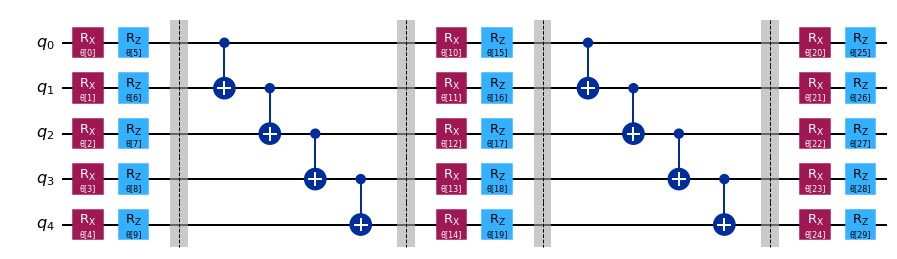

In [5]:
from qiskit.circuit.library import TwoLocal

ansatz = TwoLocal(
    num_qubits=5,
    rotation_blocks=["rx", "rz"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=2,
    insert_barriers=True,
)

ansatz.decompose().draw('mpl')

### Efficient SU2
It is a hardware efficient circuit used for preparing trial wave functions for variational quantum algorithms or as a classification circuit for machine learning

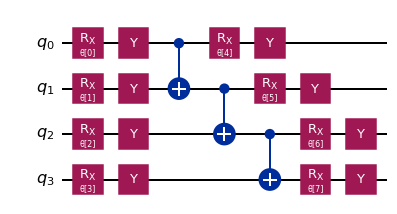

In [7]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(
    num_qubits=4,
    su2_gates=["rx", "y"],
    entanglement="linear",
    reps=1
)

ansatz.decompose().draw('mpl')

### Problem-specific ansatze
Let us look at the max-cut problem

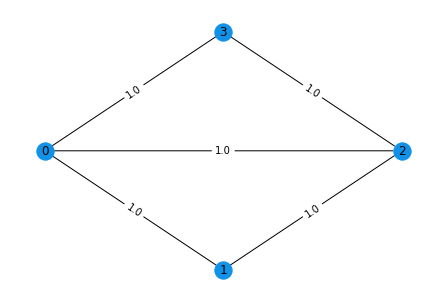

In [8]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw

n = 4
G = rx.PyGraph()
G.add_nodes_from(range(n))
edges = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
G.add_edges_from(edges)

mpl_draw(G, pos=rx.shell_layout(G), with_labels=True, edge_labels=str, node_color="#1192E8")

We will use QAOA algorithm for max-cut which requires a Pauli Hamiltonian that encodes the cost in a manner such that the minimum exceptation value of the operator corresponds to the maximum number of edges between the nodes in two different groups.

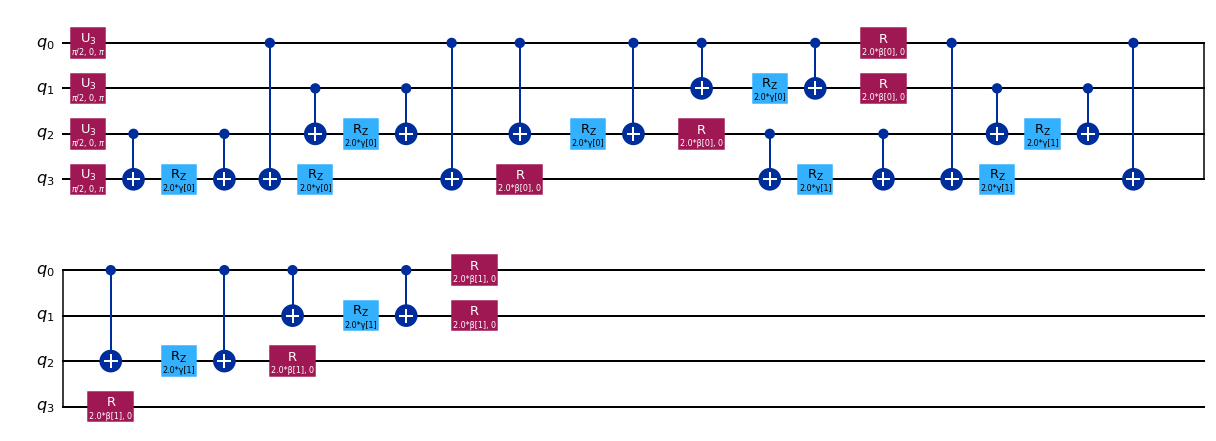

In [11]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp

hamiltonian = SparsePauliOp.from_list([("ZZII", 1), ("IZZI", 1), ("ZIIZ", 1), ("IZIZ", 1), ("IIZZ", 1)])

ansatz = QAOAAnsatz(hamiltonian, reps=2)
ansatz.decompose(reps=3).draw('mpl')

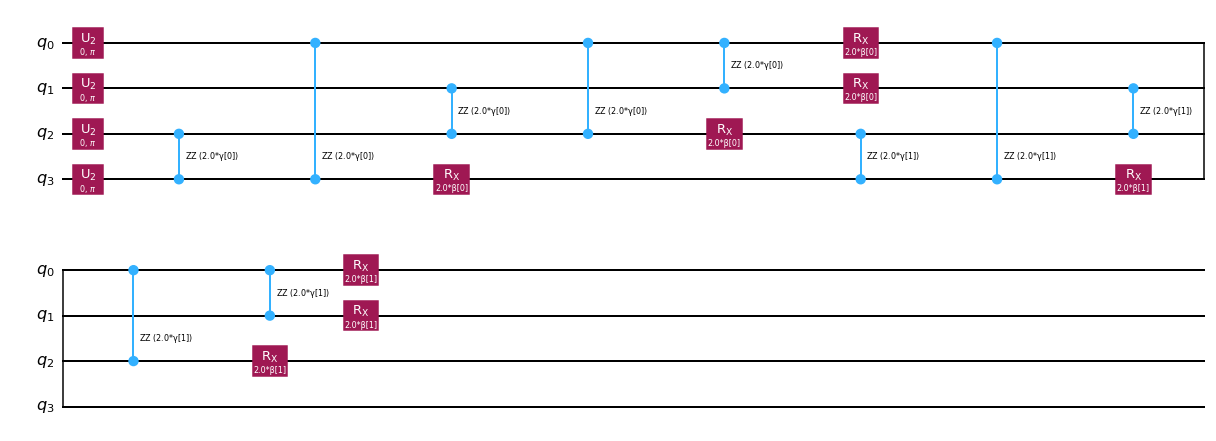

In [12]:
ansatz.decompose(reps=2).draw('mpl')

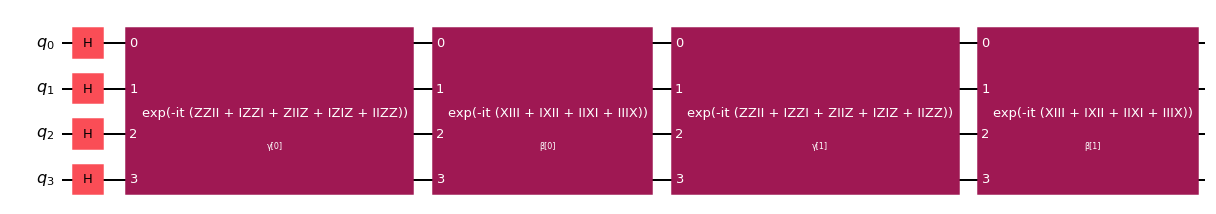

In [13]:
ansatz.decompose().draw('mpl')

### Quantum Machine Learning
Using ZZFeatureMap to create a parameterized circuit

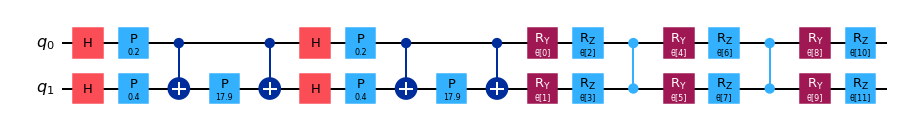

In [14]:
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
data = [0.1, 0.2]

zz_feature_map_reference = ZZFeatureMap(feature_dimension=2, reps=2)
zz_feature_map_reference = zz_feature_map_reference.assign_parameters(data)

variation_form = TwoLocal(
    num_qubits=2,
    rotation_blocks=["ry", "rz"],
    entanglement_blocks="cz",
    reps=2
)

ansatz = zz_feature_map_reference.compose(variation_form)
ansatz.decompose().draw('mpl')